In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns                                 # graphic module
import pandas as pd                                   # panel data module
import els_market_dist as emd                         # ELS market distribution

In [3]:
market_dist = emd.MarketDist()                        
sns.set(style='whitegrid',context='talk')

# ELS시장분포
- 시장전체 ELS 발행, 상환, 잔액에 대한 정보 조회
- 현재 지수형 ELS에 대한 정보만 집계가능 (KP2, NKY, HSC, HSI, SXE, SPX)
- 원금보장형에 대한 정보는 제외하고, 원금비보장형에 대한 데이터만 집계
- 예탁원 데이터베이스를 기본정보로 하고 있으나 모든 정보를 100%가져오지는 못하고 있음 

In [4]:
print('데이터기준일자: ' + market_dist.eval_date)

데이터기준일자: 2017-09-01


## 지수형ELS 월별 발행액 

In [5]:
pd.options.display.float_format = '{:,0f}'.format
m_report_all = market_dist.get_monthly_report()
print(m_report_all)
m_report_hsc = market_dist.get_monthly_report('HSC')
print(m_report_hsc)
m_report_sxe = market_dist.get_monthly_report('SXE')
print(m_report_sxe)


        EOMONTH     ISSUE  EXERCISE    ACTIVE
Jan  2017-01-31      1330 -10026646  58818941
Feb  2017-02-28      2343  -4895487  53941023
Mar  2017-03-31   2562458  -7311292  46663169
Apr  2017-04-30   2726923  -2858981  43816135
May  2017-05-31   2439130  -3314125  40652091
Jun  2017-06-30   3267564  -2687929  38214575
Jul  2017-07-31   8035140  -4842605  35892170
Aug  2017-08-31  10421146  -5432721  35293378
Sep  2017-09-30         0         0  35293378
        EOMONTH    ISSUE  EXERCISE    ACTIVE
Jan  2017-01-31     1273  -2555674  17976669
Feb  2017-02-28      830  -1581975  16404528
Mar  2017-03-31   113981  -2092637  14324305
Apr  2017-04-30   594596   -508494  13823182
May  2017-05-31   517007   -470266  13357410
Jun  2017-06-30   886522   -417287  12953185
Jul  2017-07-31  1883684  -1730842  11612772
Aug  2017-08-31  1166491   -577733  11319132
Sep  2017-09-30        0         0  11319132
        EOMONTH    ISSUE  EXERCISE    ACTIVE
Jan  2017-01-31        0  -6556995  36231392


(-100000000, 100000000)

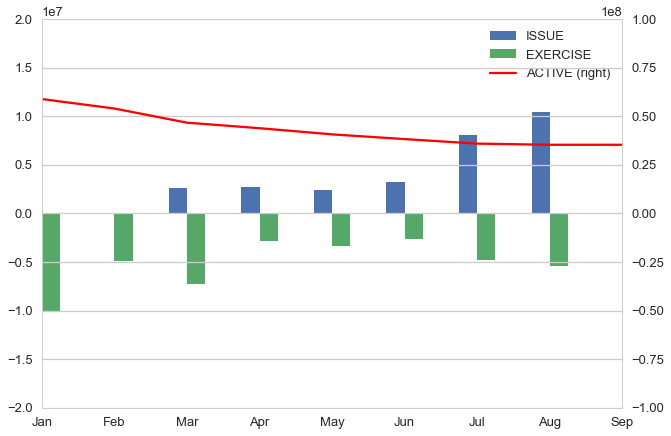

In [6]:
f, ax = plt.subplots()
m_report_all[['ISSUE','EXERCISE']] .plot(kind='bar',ax=ax)
m_report_all[['ACTIVE']] .plot(ax=ax, secondary_y=True, color='red')
ax.set_ylim(-20000000,20000000)
ax.right_ax.set_ylim(-100000000,100000000)

(-100000000, 100000000)

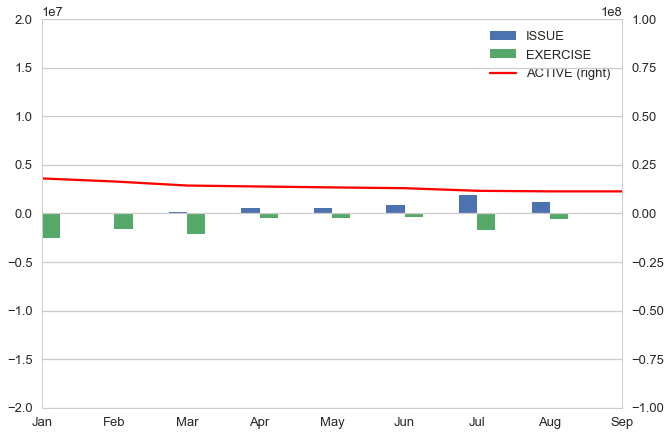

In [7]:
f, ax = plt.subplots()
m_report_hsc[['ISSUE','EXERCISE']] .plot(kind='bar',ax=ax)
m_report_hsc[['ACTIVE']] .plot(ax=ax, secondary_y=True, color='red')
ax.set_ylim(-20000000,20000000)
ax.right_ax.set_ylim(-100000000,100000000)

(-100000000, 100000000)

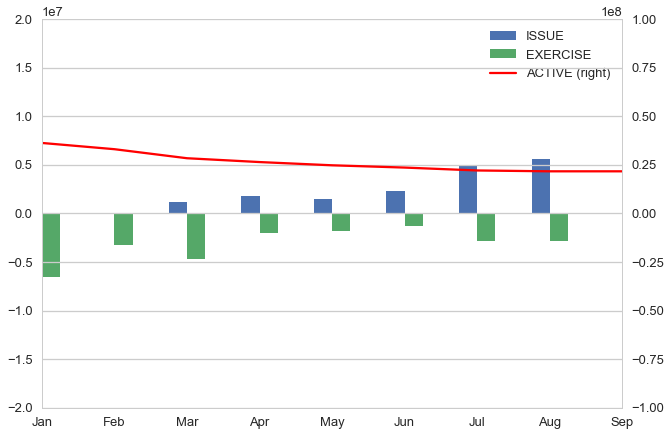

In [8]:
f, ax = plt.subplots()
m_report_sxe[['ISSUE','EXERCISE']] .plot(kind='bar',ax=ax)
m_report_sxe[['ACTIVE']] .plot(ax=ax, secondary_y=True, color='red')
ax.set_ylim(-20000000,20000000)
ax.right_ax.set_ylim(-100000000,100000000)

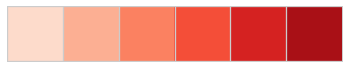

In [9]:
sns.palplot(sns.color_palette("Reds"))